Loading dataset from: data/raw/water_potability_data.csv
Dataset loaded successfully!


,ph,turbidity,tds,potability
0,NaN,2.963135,20791.318981,0
1,3.716080,4.500656,18630.057858,0
2,8.099124,3.055934,19909.541732,0
3,8.316766,4.628771,22018.417441,0
4,9.092223,4.075075,17978.986339,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ph          2785 non-null   float64
 1   turbidity   3276 non-null   float64
 2   tds         3276 non-null   float64
 3   potability  3276 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 102.5 KB

Summary Statistics:


,ph,turbidity,tds,potability
count,2785.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,3.966786,22014.092526,0.390110
std,1.594320,0.780382,8768.570828,0.487849
min,0.000000,1.450000,320.942611,0.000000
25%,6.093092,3.439711,15666.690297,0.000000
50%,7.036752,3.955028,20927.833607,0.000000
75%,8.062066,4.500320,27332.762127,1.000000
max,14.000000,6.739000,61227.196008,1.000000



Missing Values:


ph            491
turbidity       0
tds             0
potability      0
dtype: int64


Visualizing Distributions...


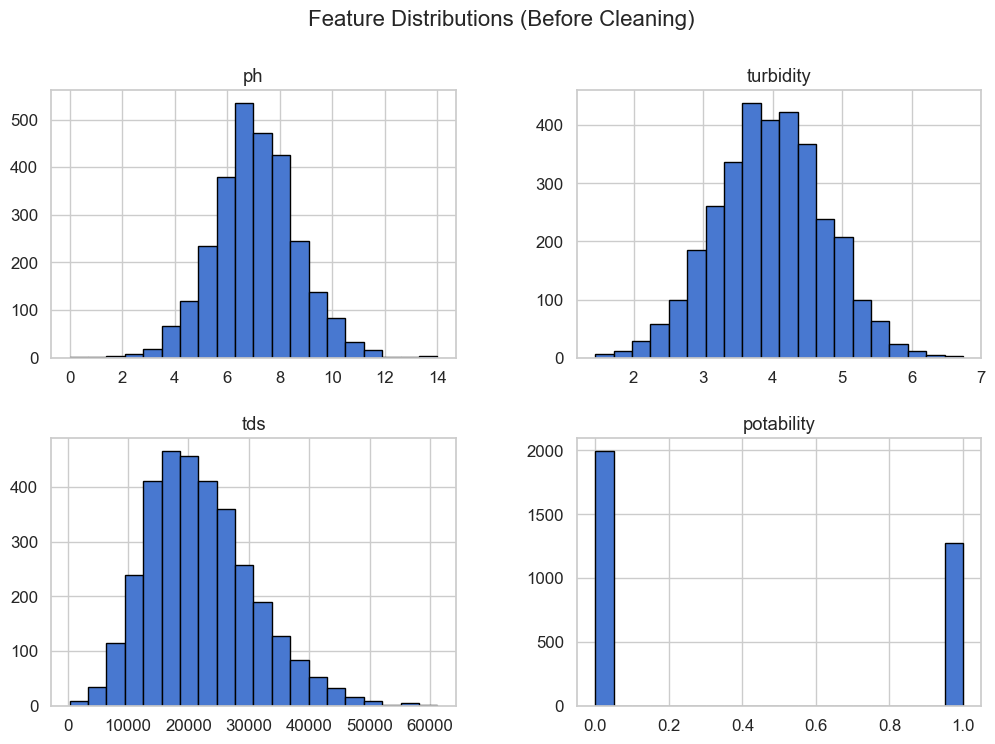


Detecting Outliers with Boxplots...


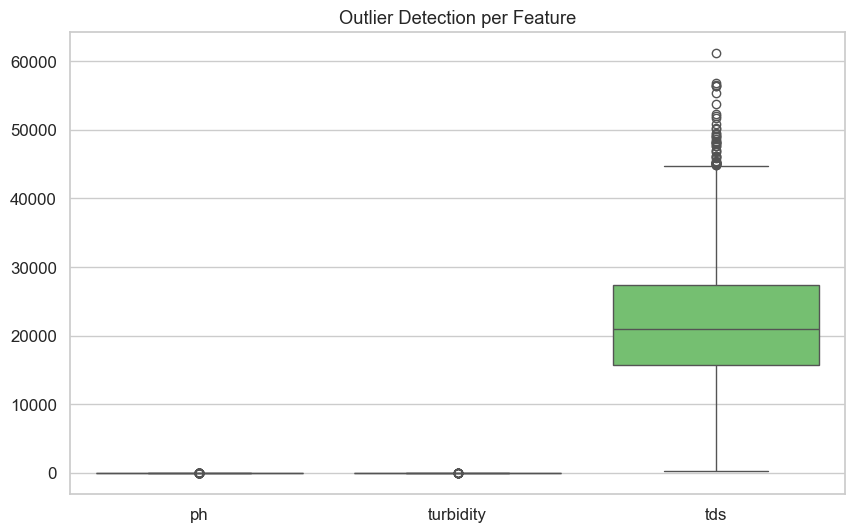


Correlation Heatmap...


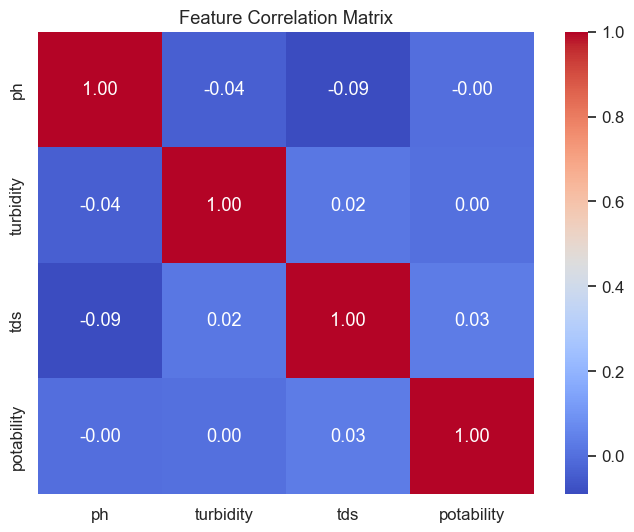


Label Distribution:


C:\Users\RAYMOND\AppData\Local\Temp\ipykernel_22308\1133550470.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_col, data=df, palette="Set2")


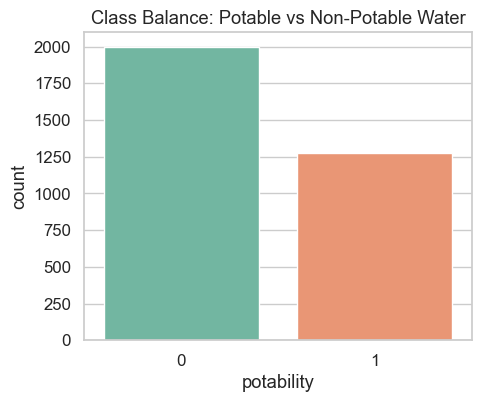


Feature Relationships (Pairplot)... (May take time on large data)


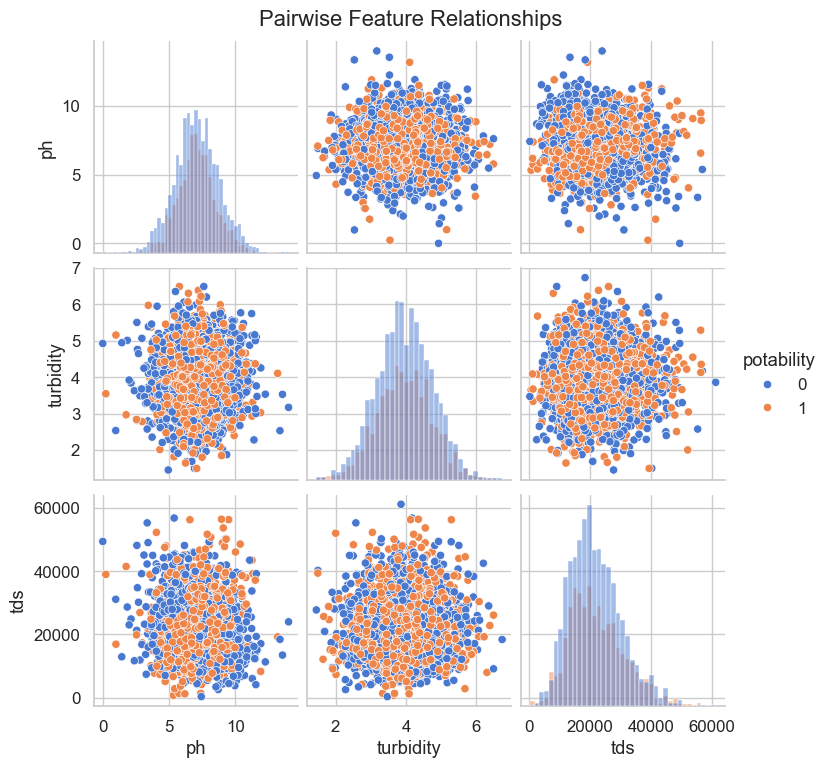


Data exploration completed! Review the charts above before cleaning.


In [ ]:

import os
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml


sns.set(style="whitegrid", palette="muted", font_scale=1.1)


with open("../src/config/config.yaml", "r") as f:
    config = yaml.safe_load(f)

raw_path = config["data"]["raw_path"]
required_columns = [c.lower() for c in config["data"]["required_columns"]]

print(f"Loading dataset from: {raw_path}")


df = pd.read_csv(os.path.join("..", raw_path))
df.columns = [c.strip().lower() for c in df.columns]

display(df.head())


print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
display(df.describe())

print("\nMissing Values:")
display(df.isnull().sum())


print("\nVisualizing Distributions...")
df[required_columns].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions (Before Cleaning)", fontsize=16)
plt.show()


print("\nDetecting Outliers with Boxplots...")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[required_columns[:-1]])
plt.title("Outlier Detection per Feature")
plt.show()


print("\nCorrelation Heatmap...")
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


label_col = required_columns[-1]
print("\nLabel Distribution:")
plt.figure(figsize=(5, 4))
sns.countplot(x=label_col, data=df, palette="Set2")
plt.title("Class Balance: Potable vs Non-Potable Water")
plt.show()


print("\nFeature Relationships (Pairplot)")
sns.pairplot(df[required_columns], hue=label_col, diag_kind="hist")
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

print("\nData exploration completed! Review the charts above before cleaning.")
